In [1]:
import numpy as np
import pandas as pd
import pickle
import sys, os
import torch
from sklearn.metrics import cohen_kappa_score

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)

from explainability_analysis.visualization_functions import * 
from explainability_analysis.transformer_analysis import *

num_classes = 12

model_root_path = "C:/Users/Ivica Obadic/EO_explainability_survey/training_results/bavarian_crops/{}_classes/".format(num_classes)

aggregation_method = "weekly_average"

predictions_path = os.path.join(model_root_path, aggregation_method, "predictions")
predictions_path

C:\Users\Ivica Obadic\PycharmProjects\EOExplainability


'C:/Users/Ivica Obadic/EO_explainability_survey/training_results/bavarian_crops/12_classes/weekly_average\\predictions'

In [6]:
#load the correct classes
predictions = np.loadtxt(os.path.join(predictions_path, "predicted_vs_true.csv"), skiprows = 1, delimiter = ",", dtype = np.uint)

#analyze single example which is correctly classified
parcel_id = "73193931"

with open(os.path.join(predictions_path, "attn_weights",'{}_attn_weights.pickle'.format(parcel_id)), 'rb') as handle:
    attn_weights_by_layer = pickle.load(handle)

with open(os.path.join(predictions_path, "attn_weights_gradients",'{}_attn_weights_gradient.pickle'.format(parcel_id)), 'rb') as handle:
    attn_weights_gradient_by_layer = pickle.load(handle)
    
attn_weights_by_layer["layer_2"].sum(dim=1)

tensor([[6.4475e-02, 5.0792e-02, 4.8863e-02, 5.7478e-02, 3.9634e-02, 3.5229e-02,
         2.5246e-02, 1.6711e-02, 1.9168e-02, 2.9515e-02, 3.8652e-02, 3.6780e-02,
         4.6020e-02, 3.3010e-02, 2.0595e-02, 8.2171e-02, 3.2105e-01, 2.1493e+01,
         2.7956e+01, 1.5435e-01, 7.1058e-02, 5.3635e-02, 1.2233e-01, 2.6663e-02,
         3.3237e-02, 3.4914e-02, 5.3776e-02, 4.5045e-02, 4.1898e-02, 1.7415e-02,
         8.6428e-02, 3.1896e-02, 4.8582e-02, 3.7157e-02, 4.4851e-02, 4.5949e-02,
         4.6678e-02, 3.4596e-02, 2.1487e-02, 3.4179e-02, 2.6687e-02, 4.8541e-02,
         5.8441e-02, 5.6291e-02, 3.5613e-02, 4.4367e-02, 3.6272e-02, 3.4392e-02,
         3.6232e-02, 3.4549e-02, 4.1375e-02, 4.7067e-02],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000

In [1]:
visualize_attn_weights_and_gradients_by_layer('layer_0', attn_weights_by_layer, attn_weights_gradient_by_layer)

NameError: name 'visualize_attn_weights_and_gradients_by_layer' is not defined

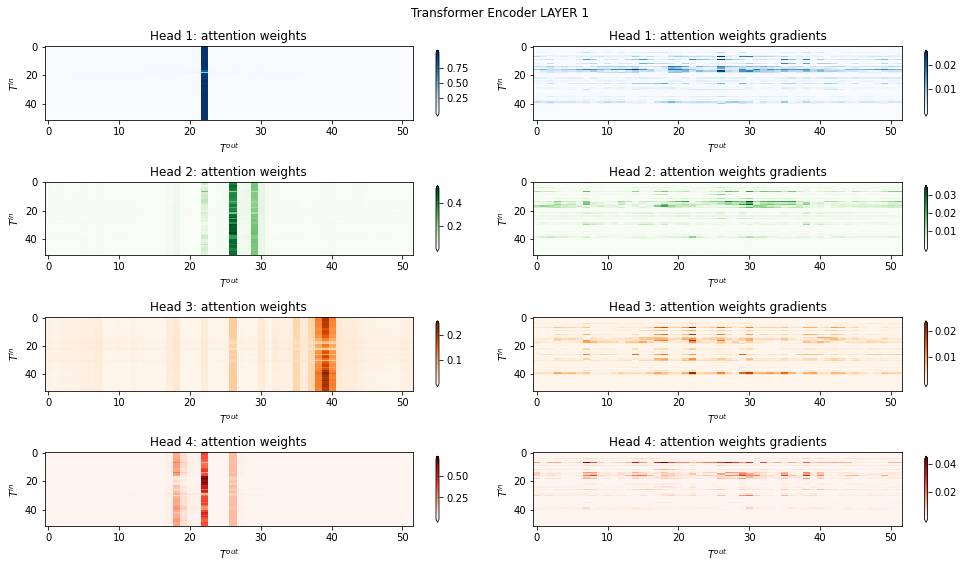

In [8]:
visualize_attn_weights_and_gradients_by_layer('layer_1', attn_weights_by_layer, attn_weights_gradient_by_layer)

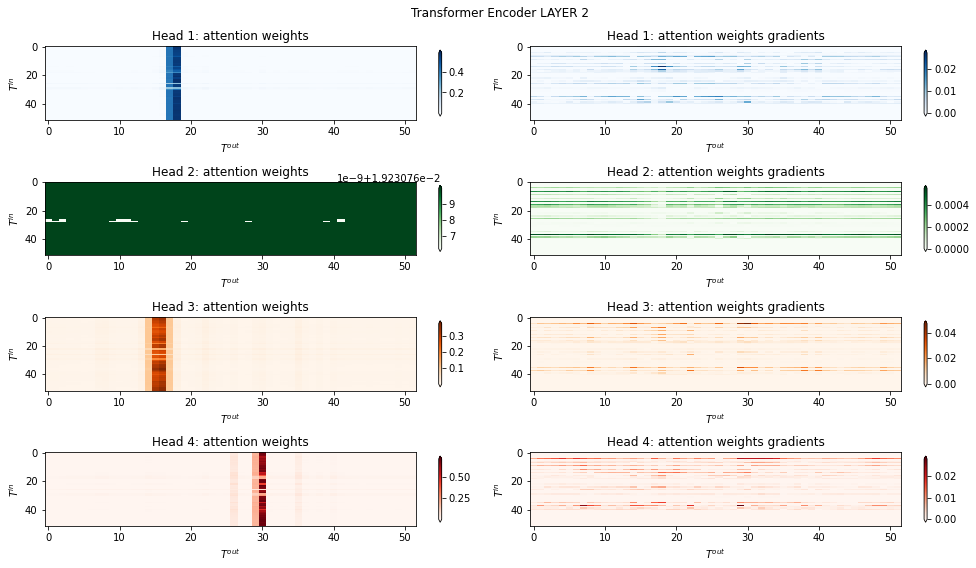

In [9]:
visualize_attn_weights_and_gradients_by_layer('layer_2', attn_weights_by_layer, attn_weights_gradient_by_layer)

In [8]:
ken_correlations = calculate_weights_gradients_correlations(predictions_path, predictions)
predicitons_df = pd.DataFrame(predictions, columns = ['parcel_id','label','predicted'])
ken_correlations = pd.merge(ken_correlations, predicitons_df, on="parcel_id")

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

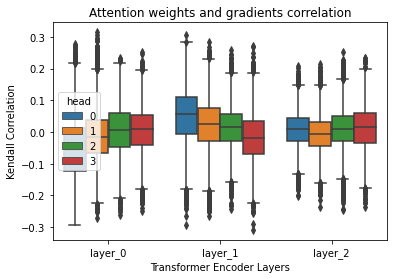

In [8]:
stacked_boxplot(
    ken_correlations,
    title="Attention weights and gradients correlation",
    xlabel="Transformer Encoder Layers",
    ylabel="Kendall Correlation")

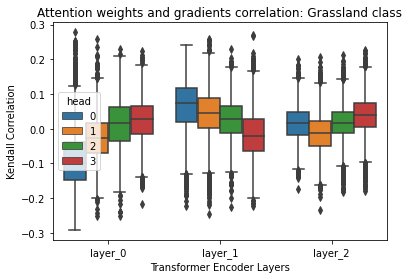

In [9]:
stacked_boxplot(
    ken_correlations[ken_correlations["label"] == 10],
    title="Attention weights and gradients correlation: Grassland class",
    xlabel="Transformer Encoder Layers",
    ylabel="Kendall Correlation")